In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
data=pd.read_csv(r"Student_performance_new.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,1.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,0.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,1.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,1.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,0.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,1.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [3]:
data.GradeClass=data.GradeClass.astype(int)
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,1
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,0


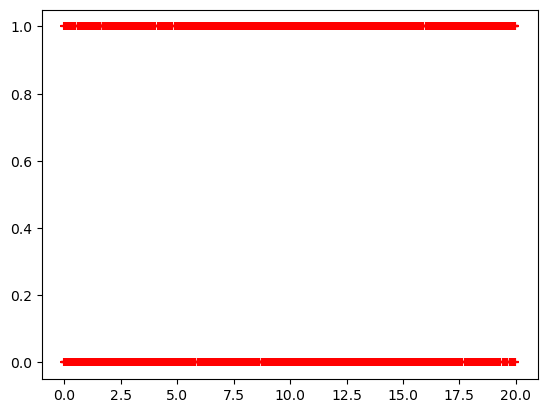

In [4]:
from matplotlib import pyplot as plt
plt.scatter(data.StudyTimeWeekly,data.GradeClass,marker='+',color='red')

In [5]:
list(data.GradeClass.unique())

[1, 0]

In [6]:
x=data.drop("GradeClass",axis=1)
x.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA'],
      dtype='object')

In [7]:
x.loc[12]

StudentID            1013.000000
Age                    17.000000
Gender                  0.000000
Ethnicity               1.000000
ParentalEducation       1.000000
StudyTimeWeekly        10.038712
Absences               21.000000
Tutoring                0.000000
ParentalSupport         3.000000
Extracurricular         1.000000
Sports                  0.000000
Music                   0.000000
Volunteering            0.000000
GPA                     1.520078
Name: 12, dtype: float64

In [8]:
y=data.GradeClass
print(y.value_counts())

GradeClass
0    1211
1    1181
Name: count, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.1)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
predict=list(model.predict(X_test))
predict[0:10]

[0, 0, 0, 1, 1, 0, 1, 1, 0, 0]

In [13]:
model_prob=list(model.predict_proba(X_test))
model_prob[0:10]

[array([0.98094023, 0.01905977]),
 array([0.70302028, 0.29697972]),
 array([0.78320879, 0.21679121]),
 array([0.06257643, 0.93742357]),
 array([0.00107464, 0.99892536]),
 array([0.96186886, 0.03813114]),
 array([0.14189218, 0.85810782]),
 array([0.01504723, 0.98495277]),
 array([0.99464615, 0.00535385]),
 array([0.99238855, 0.00761145])]

In [14]:
model.score(X_train,y_train)

0.9288702928870293

In [15]:
model.predict([[1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196]])

array([1])

In [16]:
model.predict([[1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915]])


array([1])

In [17]:
model.predict([[1002,18,0,0,3,4.210570,26,0,1,0,0,0,0,0.112615]])

array([0])

In [18]:
coefficient=list(model.coef_)
coefficient

[array([ 0.00137677, -0.02734433,  0.0512851 , -0.22245201,  0.14778303,
         0.07927575, -0.44899824,  0.35468564,  0.55731498, -0.22477602,
         0.67014898,  0.0183303 , -0.37540209,  0.88692053])]

In [19]:
coefficient[0][1]

-0.027344329534343965

In [20]:
intercept=model.intercept_

In [21]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [22]:
def prediction_function(StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA):
    z = coefficient[0][0] * StudentID + coefficient[0][1]*Age+ coefficient[0][2]*Gender+coefficient[0][3]*Ethnicity +coefficient[0][4]*ParentalEducation+coefficient[0][5]*StudyTimeWeekly+coefficient[0][6]*Absences+coefficient[0][7]*Tutoring+coefficient[0][8]*ParentalSupport+coefficient[0][9]*Extracurricular+coefficient[0][10]*Sports+coefficient[0][11]*Music+coefficient[0][12]*Volunteering+coefficient[0][13]*GPA+intercept
    y = sigmoid(z)
    return y

In [23]:
prediction_function(1013,17,0,1,1,10.0387,21,0,3,1,0,0,0,1.5200)

0.006370073892948351

In [24]:
model.predict([[1013,17,0,1,1,10.0387,21,0,3,1,0,0,0,1.5200]])

array([0])

In [25]:
model.predict_proba([[1013,17,0,1,1,10.0387,21,0,3,1,0,0,0,1.5200]])

array([[0.99362993, 0.00637007]])

In [26]:
prediction_function(1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196)

0.9760617908310463

In [27]:
model.predict_proba([[1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196]])

array([[0.02393821, 0.97606179]])

In [28]:
model.predict([[1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196]])

array([1])